In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd

from matplotlib.patches import Circle, Wedge, Polygon

import cmocean # Beautiful colormaps for oceanography
import cmocean.cm as cmo
import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

from obspy.imaging.beachball import beach

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from matplotlib.patches import Polygon

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

# set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [140]:
# # print('Min depath is:', data['DEPTH'].max())
# print('Min depth is:', data['MW'].min())

In [141]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/ryu_kur_class_by_loc_net.csv", header = 'infer')
# data.dtypes

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [142]:
data_mthrust = data[(data['CLASS'] == 'MTHRUST') &
                    (data['MW'] >= 7.5) &
                    (data['LAT'] > 34) & (data['LAT'] < 55)] # Japan-KK megathrust, (data['LAT'] < 43)


data_DW = data[(data['CLASS'] == 'DGOING') &
               (data['DEPTH'] > 20) & (data['DEPTH'] < 225) & #100-500 best fit
               (data['MW'] >= 6) &
              (data['LAT'] < 34) & (data['LAT'] > 23.5) &
              (data['LON'] > 123)] # Philipines deep slab

# data_DW = data[(data['CLASS'] == 'DGOING') &
#                (data['DEPTH'] > 50) & (data['DEPTH'] < 225) & #100-500 best fit
#                (data['MW'] >= 4) &
#               (data['LAT'] < 34)] # Philipines deep slab

In [143]:
## Deep Kuril-Kamchatka slab, north of Japan
data_dgoing_kk = data_DW

## calculate seismic energy
dg_exp_kk = np.asarray(data_dgoing_kk['EX'])
dg_mo_kk = np.asarray(data_dgoing_kk['MO'])
dg_time_kk = np.asarray(data_dgoing_kk['YEARS'])
dg_energy_kk = dg_mo_kk*np.power(10., dg_exp_kk)
dg_energy_kk_cum = np.cumsum(dg_energy_kk)

In [144]:
## megathrust earthquakes from Japan-Kuril-Kamchatka

# data_mthrust = data.loc[data['CLASS'] == 'MTHRUST']
# data_mthrust = data_mthrust[(data_mthrust['TYPE'] == 'THRUST') & (data_mthrust['TYPE'] == 'O_THRUST')]

data_mthrust = data_mthrust

## calculate seismic energy
mthrust_exp_total = np.asarray(data_mthrust['EX'])
mthrust_mo_total = np.asarray(data_mthrust['MO'])
mthrust_time_total = np.asarray(data_mthrust['YEARS'])
mthrust_energy_total = mthrust_mo_total*np.power(10., mthrust_exp_total)
mthrust_energy_total_cum = np.cumsum(mthrust_energy_total)

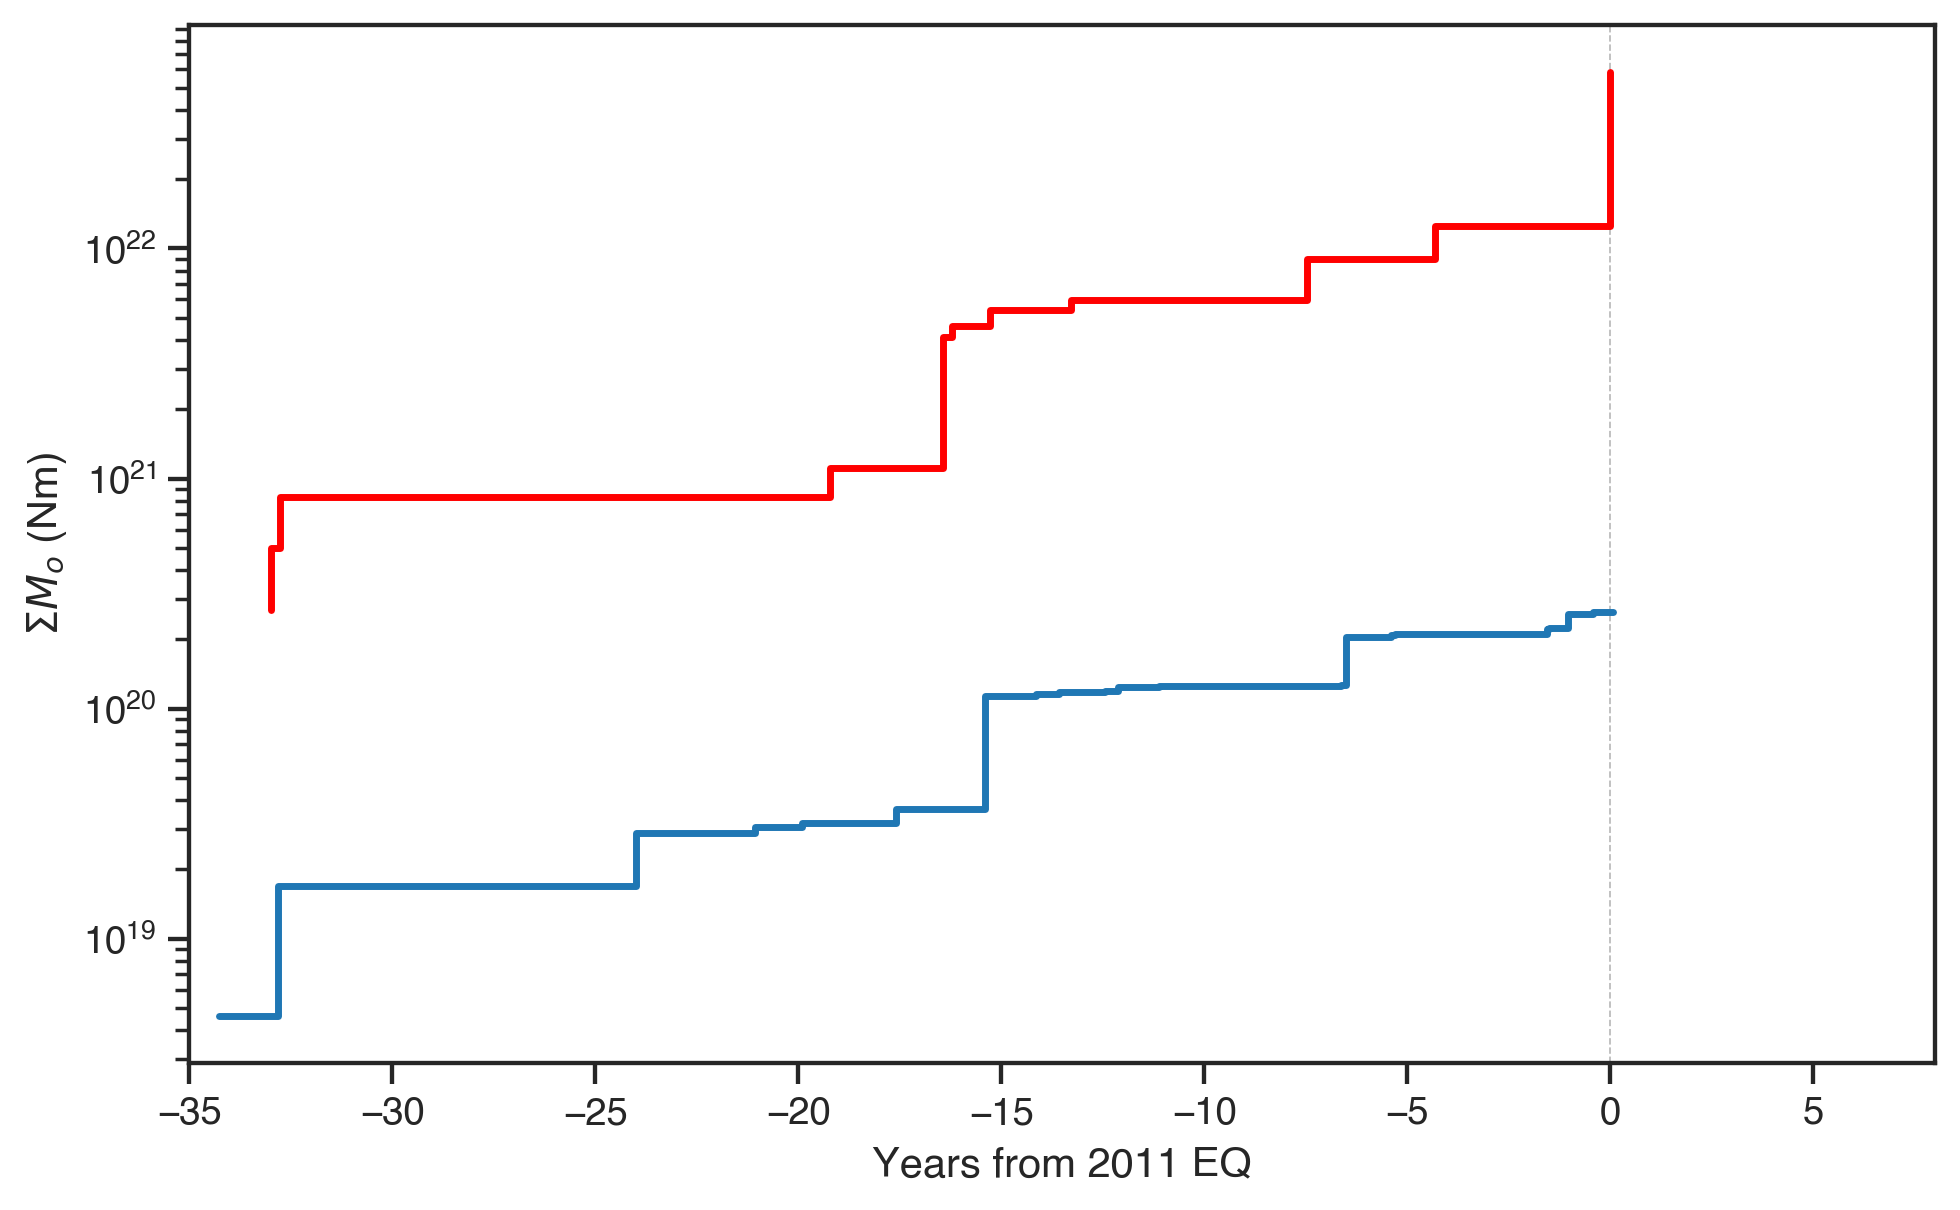

In [145]:
# plot
figsize = (8,5)
dpi=250
# lw = 1.5

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1 = ax

lw = 2
alpha=0.3
# bands left to right
# fig1.axvline(x=-33, color='olive', lw=lw, ls='-', alpha=alpha)
# fig1.axvline(x=-27.8, color='green', lw=lw, ls='-', alpha=alpha)
# fig1.axvline(x=-16.5, color='orange', lw=lw, ls='-', alpha=alpha)
# fig1.axvline(x=-7.5, color='maroon', lw=lw, ls='-', alpha=alpha)
# fig1.axvline(x=-4.2, color='tab:purple', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
# # fig1.axvline(x=-2.874320, color='red', lw=lw, ls='-', alpha=alpha)
# fig1.axvline(x=0, color='yellow', lw=lw, ls='-', alpha=0.4)
fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=alpha)
# fig1.axvline(x=2, color='grey', lw=lw, ls='-', alpha=alpha)



############### Sumatra megathrust ####################
new_t = []
for i, s in enumerate(mthrust_time_total):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(mthrust_energy_total_cum):
    if i != 0:
        new_y.append(mthrust_energy_total_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

fig1.plot(new_t, new_y, '-', color = 'red', lw = 2, label='Japan Megathrust')


################ slab ############################

new_t = []
for i, s in enumerate(dg_time_kk):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(dg_energy_kk_cum):
    if i != 0:
        new_y.append(dg_energy_kk_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

fig1.plot(new_t, new_y, '-', color = 'tab:blue', lw = 2, label='North slab (> 250 km)')


fig1.set_yscale('log')

fig1.set_xlim([-35, 8])
# fig1.set_ylim([1e18, 1e23])

# fig1.legend(loc = 'upper left',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="grey",
#             markerscale=1)

fig1.set_xlabel('Years from 2011 EQ')
fig1.set_ylabel(r'$\Sigma M_o$ (Nm)')

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/mt_slab_time-series.pdf"
#             , dpi = 500, transparent= True, bbox_inches='tight')

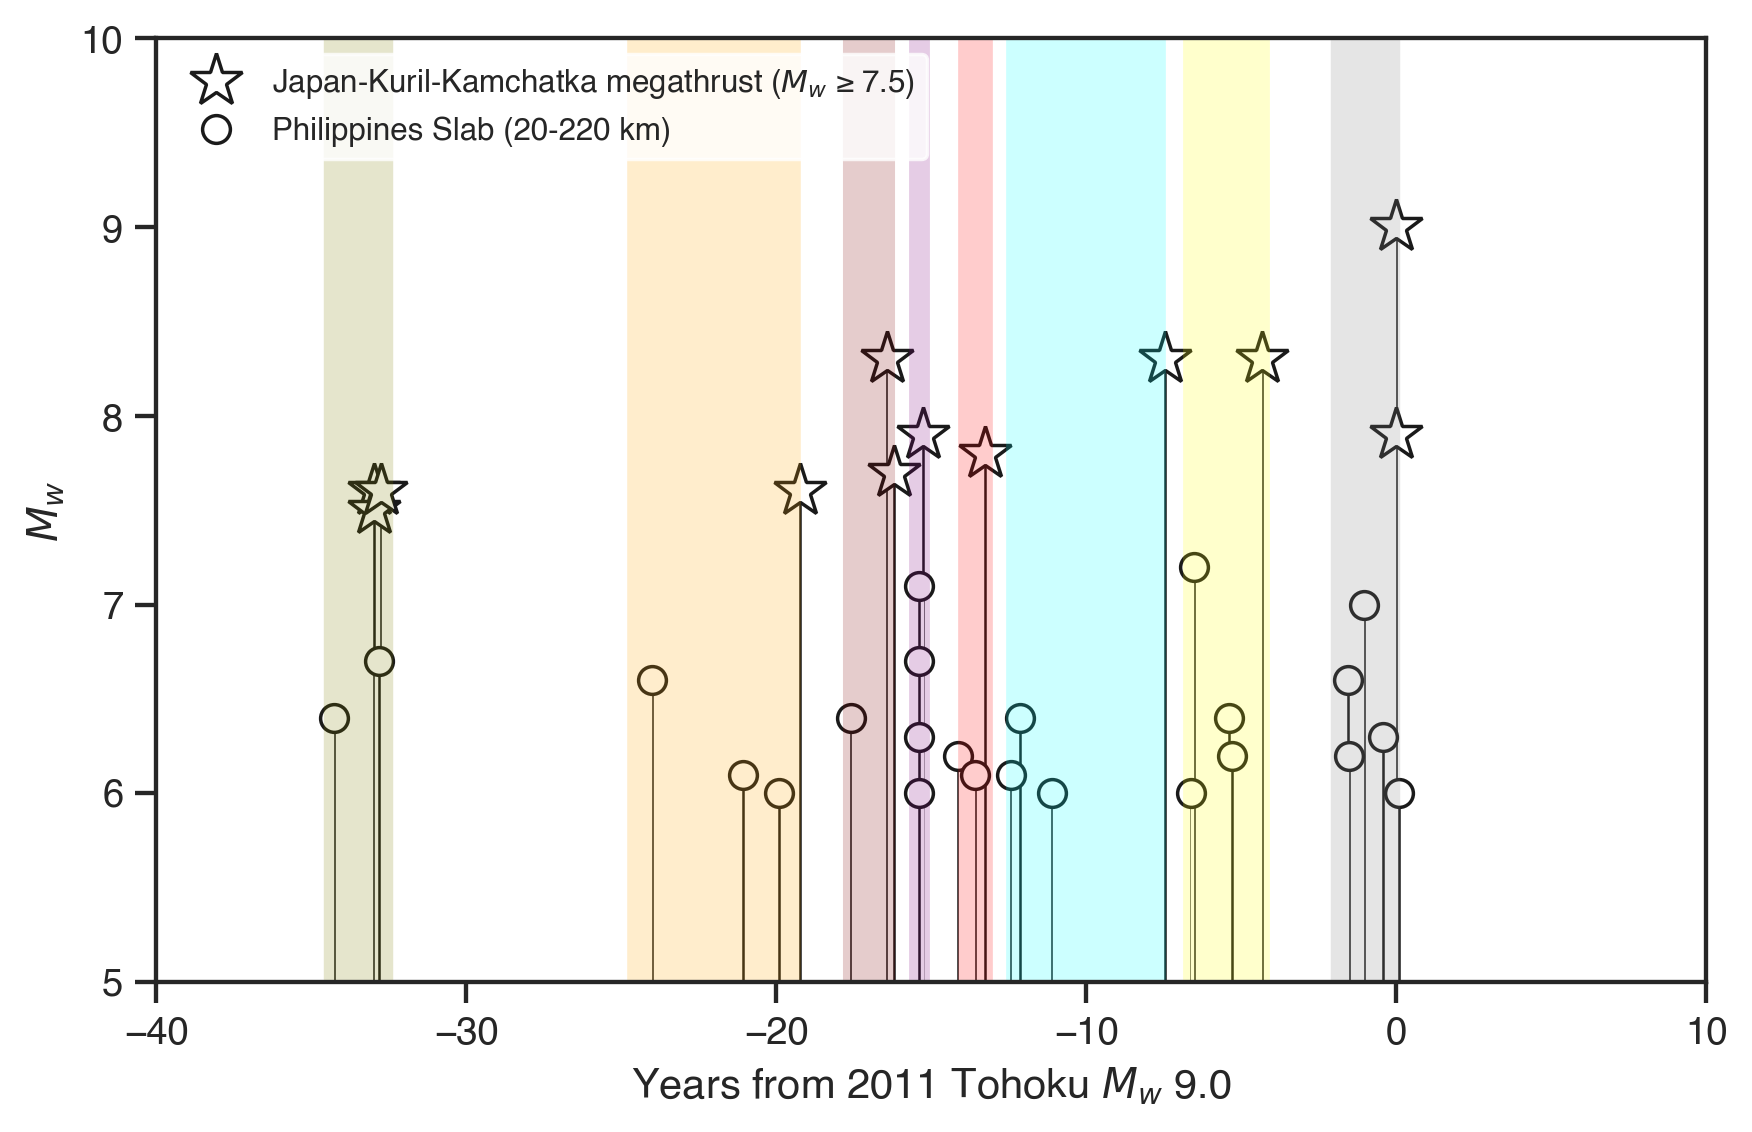

In [146]:
figsize = (8,5)
dpi=250
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = 0.18)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color='k',
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = 0.18)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color='k',
          markersize = 8, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

# fig1.set_xlim([-35, -32])
fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])

fig1.axvline(x=-33.5, color='olive', lw=20, ls='-', alpha=0.2)
fig1.axvline(x=-22, color='orange', lw=50, ls='-', alpha=0.2)
fig1.axvline(x=-17, color='maroon', lw=15, ls='-', alpha=0.2)
fig1.axvline(x=-15.4, color='purple', lw=6, ls='-', alpha=0.2)
fig1.axvline(x=-13.6, color='red', lw=10, ls='-', alpha=0.2)
fig1.axvline(x=-10, color='cyan', lw=46, ls='-', alpha=0.2)
fig1.axvline(x=-5.5, color='yellow', lw=25, ls='-', alpha=0.2)
fig1.axvline(x=-1, color='gray', lw=20, ls='-', alpha=0.2)

fontsize = 9
fig1.legend(loc = 'upper left',
            fontsize = fontsize,
            facecolor="white",
            edgecolor="white",
            markerscale=1)

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/TimeSeries_JKK_mega-Ryu_Slab.jpeg"
#             , dpi = 500, transparent= True, bbox_inches='tight')

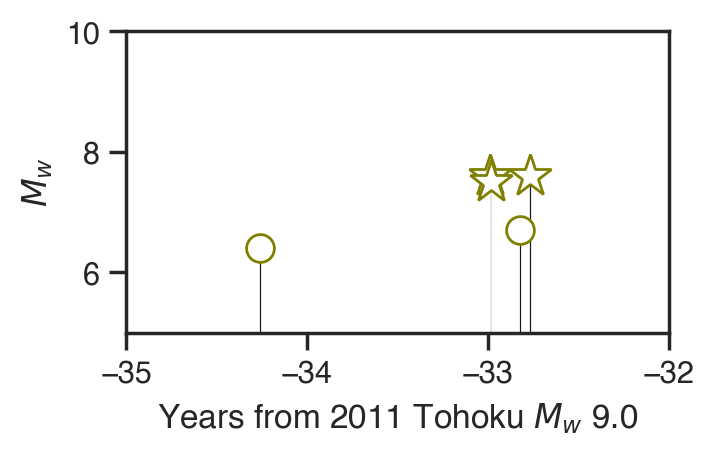

In [147]:
## zoom in into olive band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.02
fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color='olive',
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color='olive',
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-35, -32])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/olive_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

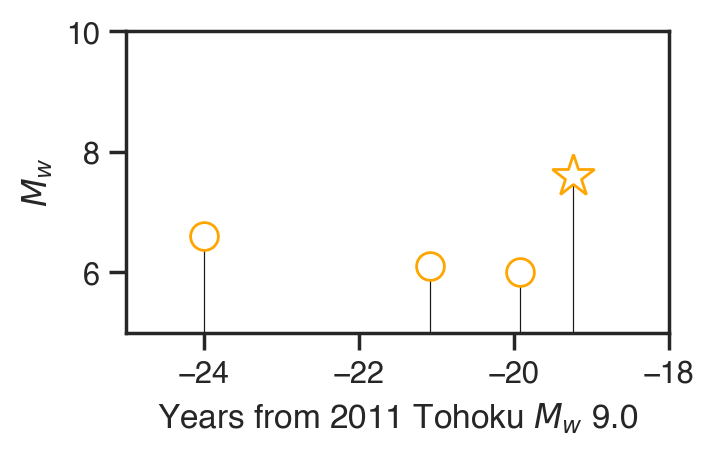

In [148]:
## zoom in into orange band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.05
color = 'orange'
fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-25, -18])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/orange_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

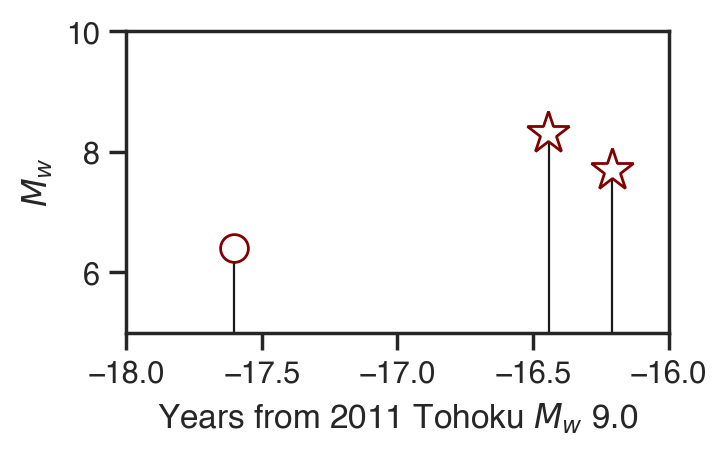

In [149]:
## zoom in into maroon band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.02
color = 'maroon'
fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-18, -16])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/maroon_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

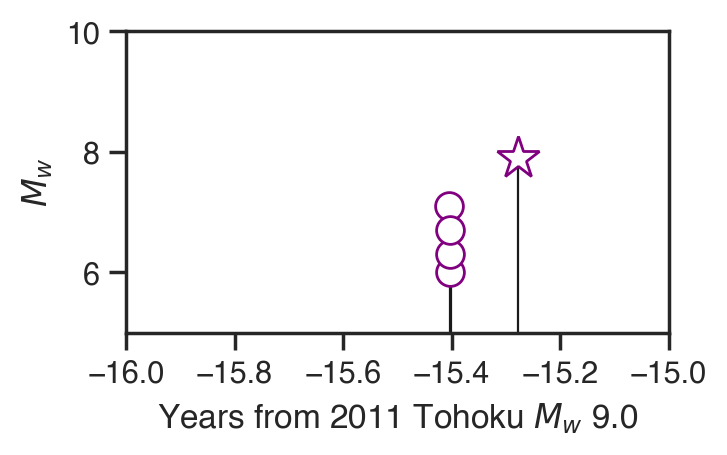

In [150]:
## zoom in into purple band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.01
color = 'purple'
fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-16, -15])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/purple_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

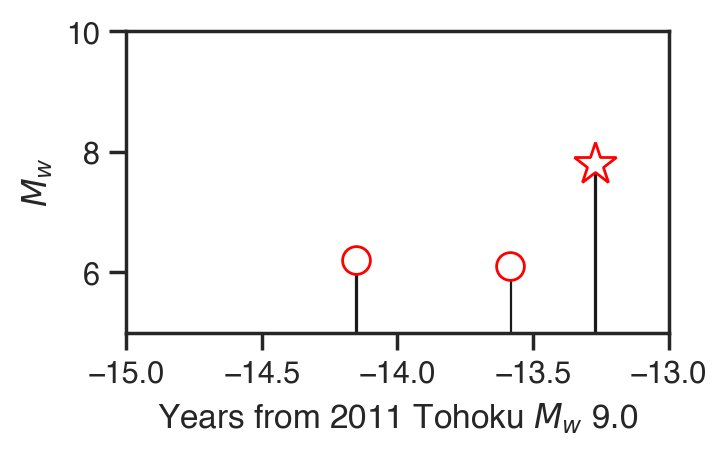

In [151]:
## zoom in into red band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.02
color = 'red'
fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-15, -13])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/red_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

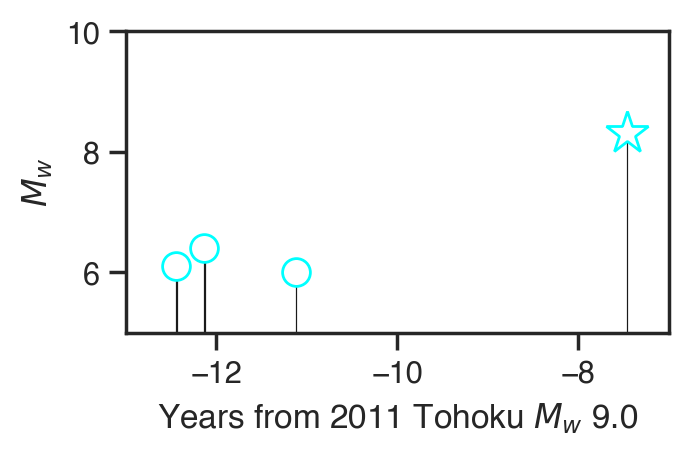

In [152]:
## zoom in into cyan band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.05
color = 'cyan'

fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-13, -7])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/cyan_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

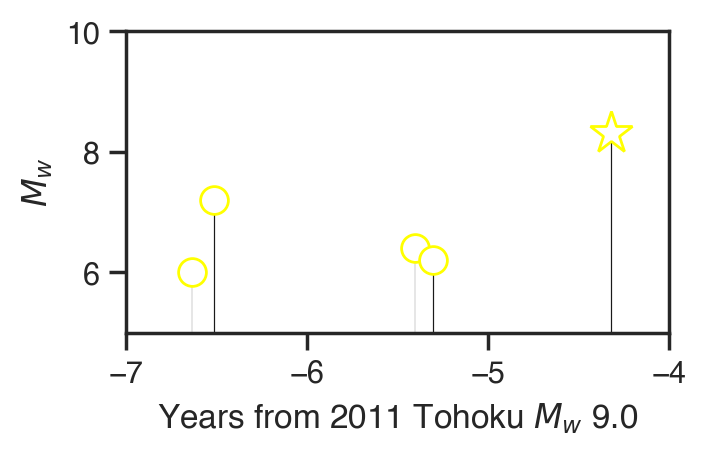

In [153]:
## zoom in into yellow band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.02
color = 'yellow'

fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-7, -4])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/yellow_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

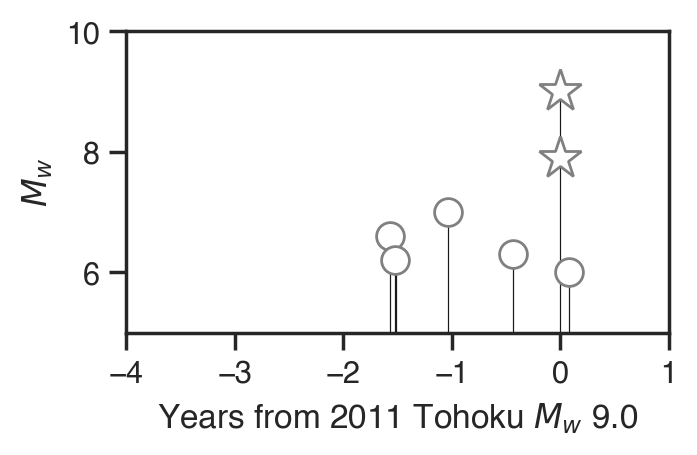

In [154]:
## zoom in into grey band

figsize = (3.5,2)
dpi=200
width = 0
lw = 5
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


width = 0.04
color = 'grey'

fig1.bar(data_mthrust['YEARS'], data_mthrust['MW'], color = 'k', width = width)
fig1.plot(data_mthrust['YEARS'], data_mthrust['MW'], '*', color=color,
          markersize = 16, markerfacecolor = 'white', label = 'Japan-Kuril-Kamchatka megathrust ($M_w$ ≥ 7.5)')

fig1.bar(data_DW['YEARS'], data_DW['MW'], color = 'k', width = width)
fig1.plot(data_DW['YEARS'], data_DW['MW'], 'o', color=color,
          markersize = 10, markerfacecolor = 'white', label = 'Philippines Slab (20-220 km)')


fig1.set_xlabel('Years from 2011 Tohoku $M_w$ 9.0')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fig1.set_xlim([-4, 1])
# fig1.set_xlim([-40, 10])
fig1.set_ylim([5, 10])


plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/grey_TimeSeries_JKK_mega-Ryu_Slab.jpeg"
            , dpi = 500, transparent= True, bbox_inches='tight')

In [155]:
# print('JKK Megathrust EQs')
# print(data_mthrust[['LAT','LON','DEPTH', 'YEARS', 'MW', 'DATE']])

# print('Ryu slab EQs')
# print(data_DW[['LAT','LON','DEPTH', 'YEARS', 'MW', 'DATE']])

In [156]:
# olive band

mega_olive = -34.259094

t1 = mega_olive - 2
t2 = mega_olive + 2

olive_eq_ryu = data_DW[(data_DW['YEARS'] > t1) & (data_DW['YEARS'] < t2)]

#normalize around megathrust earthquake for olive band
olive_eq_ryu['YEARS'] = ((olive_eq_ryu['YEARS'] - mega_olive))

#calculate seismic moment released
olive_exp_sum = np.asarray(olive_eq_ryu['EX'])
olive_mo_sum = np.asarray(olive_eq_ryu['MO'])
olive_time_sum = np.asarray(olive_eq_ryu['YEARS'])
olive_energy_sum = olive_mo_sum*np.power(10., olive_exp_sum)
olive_energy_sum_cum = np.cumsum(olive_energy_sum)

# counts
olive_count = olive_eq_ryu.groupby('YEARS').size()

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [157]:
# orange band

mega_orange = -16.210211

t1 = mega_orange - 4
t2 = mega_orange + 4

orange_eq_ryu = data_DW[(data_DW['YEARS'] > t1) & (data_DW['YEARS'] < t2)]

#normalize around megathrust earthquake for orange band
orange_eq_ryu['YEARS'] = ((orange_eq_ryu['YEARS'] - mega_orange))

#calculate seismic moment released
orange_exp_sum = np.asarray(orange_eq_ryu['EX'])
orange_mo_sum = np.asarray(orange_eq_ryu['MO'])
orange_time_sum = np.asarray(orange_eq_ryu['YEARS'])
orange_energy_sum = orange_mo_sum*np.power(10., orange_exp_sum)
orange_energy_sum_cum = np.cumsum(orange_energy_sum)

# counts
orange_count = orange_eq_ryu.groupby('YEARS').size()

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [158]:
# maroon band

mega_maroon = -7.461408

t1 = mega_maroon - 4
t2 = mega_maroon + 4

maroon_eq_ryu = data_DW[(data_DW['YEARS'] > t1) & (data_DW['YEARS'] < t2)]

#normalize around megathrust earthquake for maroon band
maroon_eq_ryu['YEARS'] = ((maroon_eq_ryu['YEARS'] - mega_maroon))

#calculate seismic moment released
maroon_exp_sum = np.asarray(maroon_eq_ryu['EX'])
maroon_mo_sum = np.asarray(maroon_eq_ryu['MO'])
maroon_time_sum = np.asarray(maroon_eq_ryu['YEARS'])
maroon_energy_sum = maroon_mo_sum*np.power(10., maroon_exp_sum)
maroon_energy_sum_cum = np.cumsum(maroon_energy_sum)

# counts
maroon_count = maroon_eq_ryu.groupby('YEARS').size()

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [159]:
# maroon band

mega_maroon = -7.461408

t1 = mega_maroon - 4
t2 = mega_maroon + 4

maroon_eq_ryu = data_DW[(data_DW['YEARS'] > t1) & (data_DW['YEARS'] < t2)]

#normalize around megathrust earthquake for maroon band
maroon_eq_ryu['YEARS'] = ((maroon_eq_ryu['YEARS'] - mega_maroon))

#calculate seismic moment released
maroon_exp_sum = np.asarray(maroon_eq_ryu['EX'])
maroon_mo_sum = np.asarray(maroon_eq_ryu['MO'])
maroon_time_sum = np.asarray(maroon_eq_ryu['YEARS'])
maroon_energy_sum = maroon_mo_sum*np.power(10., maroon_exp_sum)
maroon_energy_sum_cum = np.cumsum(maroon_energy_sum)

# counts
maroon_count = maroon_eq_ryu.groupby('YEARS').size()

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [160]:
# purple band

mega_purple = 0

t1 = mega_purple - 4
t2 = mega_purple + 4

purple_eq_ryu = data_DW[(data_DW['YEARS'] > t1) & (data_DW['YEARS'] < t2)]

#normalize around megathrust earthquake for purple band
purple_eq_ryu['YEARS'] = ((purple_eq_ryu['YEARS'] - mega_purple))

#calculate seismic moment released
purple_exp_sum = np.asarray(purple_eq_ryu['EX'])
purple_mo_sum = np.asarray(purple_eq_ryu['MO'])
purple_time_sum = np.asarray(purple_eq_ryu['YEARS'])
purple_energy_sum = purple_mo_sum*np.power(10., purple_exp_sum)
purple_energy_sum_cum = np.cumsum(purple_energy_sum)

# counts
purple_count = purple_eq_ryu.groupby('YEARS').size()

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(-5, 7.2, 'Philippines slab EQs \n \n (150-200 km)')

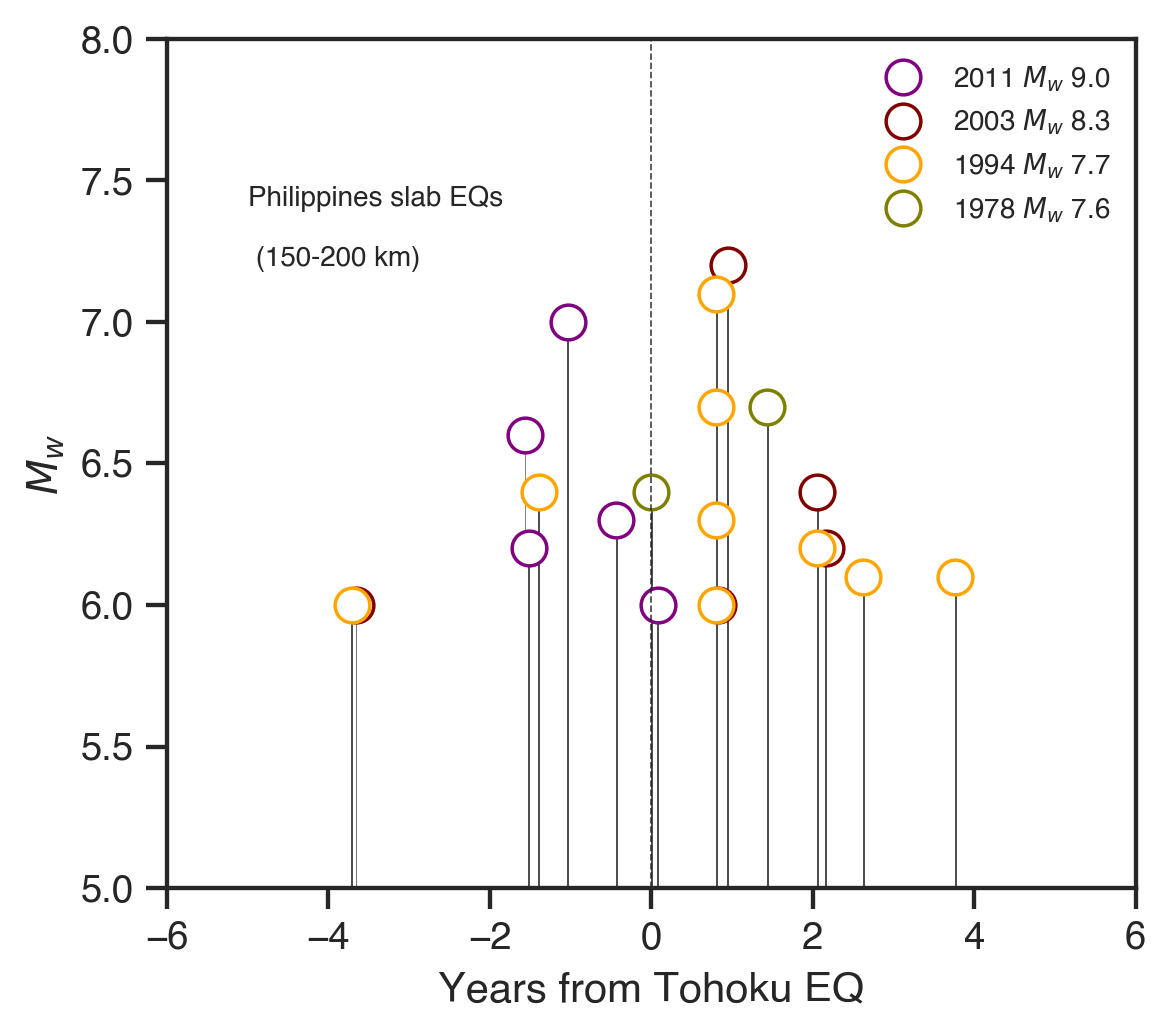

In [161]:
figsize = (5,4.5)
dpi=250
width = 0.06
lw = 2
markersize = 10


fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


fig1.bar(purple_eq_ryu['YEARS'], purple_eq_ryu['MW'], color = 'k', width = width)
fig1.plot(purple_eq_ryu['YEARS'], purple_eq_ryu['MW'],'o', color='purple',
          markersize = markersize, markerfacecolor = 'white', label= '2011 $M_w$ 9.0')

fig1.bar(maroon_eq_ryu['YEARS'], maroon_eq_ryu['MW'], color = 'k', width = width)
fig1.plot(maroon_eq_ryu['YEARS'], maroon_eq_ryu['MW'], 'o', color='maroon',
          markersize = markersize, markerfacecolor = 'white', label= '2003 $M_w$ 8.3')

fig1.bar(orange_eq_ryu['YEARS'], orange_eq_ryu['MW'], color = 'k', width = width)
fig1.plot(orange_eq_ryu['YEARS'], orange_eq_ryu['MW'], 'o', color='orange',
          markersize = markersize, markerfacecolor = 'white', label= '1994 $M_w$ 7.7')

fig1.bar(olive_eq_ryu['YEARS'], olive_eq_ryu['MW'], color = 'k', width = width)
fig1.plot(olive_eq_ryu['YEARS'], olive_eq_ryu['MW'], 'o', color='olive',
          markersize = markersize, markerfacecolor = 'white', label= '1978 $M_w$ 7.6')

fig1.axvline(x=0, color='k', lw=0.5, ls='--', alpha=0.8)

fig1.set_xlim([-6, 6])
fig1.set_ylim([5, 8])

fig1.set_xlabel('Years from Tohoku EQ')
#plt.ylabel(r'$\Sigma M_o$')
fig1.set_ylabel(r'$M_w$')

fontsize = 8
fig1.legend(loc = 'upper right',
            fontsize = fontsize,
            facecolor="white",
            edgecolor="white",
            markerscale=1)

fig1.text(-5, 7.2, 'Philippines slab EQs \n \n (150-200 km)', fontsize=fontsize)

# fig1.text(-1.9, 7.8, '(b)', fontsize=14)
# fig1.text(-1.7, 7.2, 'ryu slab EQs \n \n (> 290 km)', fontsize=fontsize)

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/JapanMT-RyuSlab.jpeg"
#             , dpi = 500, transparent= True, bbox_inches='tight')